## Introduction
In Part 9 KMeans Clustering vs LDA Topic Modeling. we did topic modeling on the 1941 papers mentioned Polymerase.

Link to Part 9 KMeans Clustering vs LDA Topic Modeling
#### https://www.kaggle.com/leijiang1/part-9-kmeans-clustering-vs-lda-topic-modeling


The topics identified as below:
### Topics:
#### G0 flu children clinical
#### G1 gene protein cell 
#### G2 bat host phylogenetic 
#### G3 SARS COV MERS COV
#### G4 diganosis asssay detection 
#### G5 RdRp RNA replication



#### Topic Modeling can help us quickly gain the big picture of the major topics in a large collection of papers. It also helps by giving a rough index so you know where to look for the type of information you want (which cluster you should go). For example, if you are looking for information about diagnosis assay, you should probably go to "Group 5 diagnosis assay detection" to find information faster. If you are interested about "children" and "clinical" related information, you should go to "Group 1 flu children clinical".

Group these papers also helps with question answering tasks. For example, we know which subgroup of paper to go and ask a question based on the main topic of the question.

## Interactive 3D visualization of Clusters

#### In addition, I created an interactive 3D plot of the previous 6 clusters of papers in Java. 
#### You can drag the mouse to change angles of view. 
#### It is interesting to see how the papers distributed in space and view the relative positions to other papers.
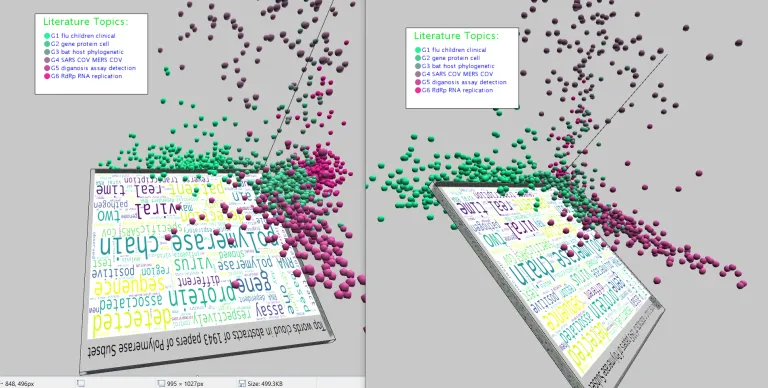

#### Figure 1. 3D visual
The code is on my GitHub.

https://github.com/lj89/Data-Visualization/tree/master/3Djava





## Method
#### Use these topics as labels, we can use the 1941 papers (subset on March 26) as a training dataset to build a classification model that classify new papers. I use 388 papers newly updated papers (subet of April 12-subset on March 26) as a Hold Out test dataset to give these new papers a topic label.

#### For this 6 classes classification problem:
### Random Forest (RF), XGBoost (XGB) and Multilayer perceptron (MLP) classifiers with good prediction accuracies are built.
#### In addition, ensemble model of all three is built to make the modle better generalizable.

### Steps:
#### Use Universal Sentence Encoder (USE) to vectorize abstracts to 512 dimension vectors.
#### Use the G0-5 as the true labels to train classifers.
#### Validate each classifier achieved good performance.
#### Majority vote of RF, GXB, MLP to generate the final prediction.

## Results

#### Since the new papers are without label, I used the three models to kind of cross validate the results.
XGB predictions match well with MLP predictions with 89.7% agreement.

XGB vs RF: agree on 81.2% of the predictions.

MLP vs RF: agree on 81.4% of the predictions. 


#### For the majority vote results, there are 10 instances that all three methods produce different predictions. So the majority vote would not work. For a problem like this with 6 classes, we need at least 7 different models to ensemble to make sure there is a majority vote result.


#### The performance of each type of model varies. The MLP model by itself yielded 0.8329 accuracy on a validation dataset.

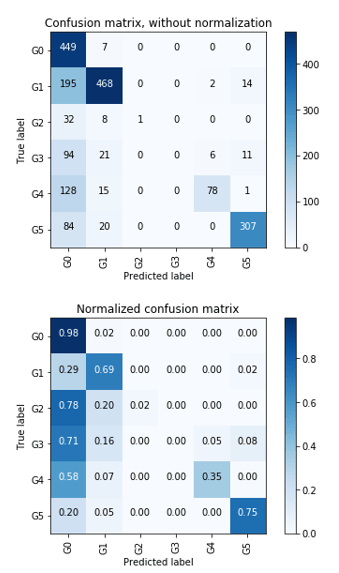
#### Figure 2. Confusion Matrix of the RF classifier for paper classification.


#### The table below shows the RF classifer performance. Group 2,3 had not so ideal results due to they are less common in the training dataset.
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       456
           1       0.87      0.69      0.77       679
           2       1.00      0.02      0.05        41
           3       0.00      0.00      0.00       132
           4       0.91      0.35      0.51       222
           5       0.92      0.75      0.83       411

   micro avg       0.90      0.63      0.74      1941
   macro avg       0.77      0.44      0.50      1941
weighted avg       0.84      0.63      0.70      1941
 samples avg       0.63      0.63      0.63      1941




## Conclusion
#### Now when there is a new paper come, we have a model that can predict which group the paper could be belong to with a pretty decent accuracy. 


## Future work
#### For this classification task:
#### To improve the models, consider it is a imbalance dataset use class weight.
#### Parameters tuning for RF and XGB with a thorough Grid search.
#### Neural Architecture search for MLP.

## Discussion
As I have solid five years graduate level biomedical research experience and had read hundreds of papers in this domain in the past, I feel compelled need to contribute to this knowledge discovery project.  I start most analysis at abstract level because I think abstract (even the title)  is a good starting point for this project. First, abstract is the first thing we read in a paper in most cases. Additionally, according to my own experience and others’ posts, the take home messages of a paper usually could be summarized from abstract and conclusion section. In addition, the best practice is also to confirm that in discussion.  When conducting research, for most papers we just read the abstracts and a few important figures and conclusions. Only a small amount of papers need to read thoroughly. 

If we want a broader scope of an overview in the field, introduction is a good place to find this type of information. If we need to go deep, we can even go to the references to find out the related papers.

### Future direction
Also search on well known authors in a particular field and systematically analyze most of their papers. It must be very interesting to  see how their interest and research developed.

I already tried to generate summary of the papers from abstract and combine these summaries of papers about a certain topic to generate a more complete summary about the question of interest. The results from this process could be bias sometimes.  Thus, I also want to try utilize the information in the conclusion section to help make the summary more accurate.

Further down the road, I hope we can train some model or build some pipelines to read the experimental results and generate summaries on that.

In addition, the number of times a paper was cited can be a feature to predict how important this paper is. So try to integrate this information in the most related article recommender.

There are many challenges in this project. For example, what should we do when the conclusions in papers are contradicting? How can we teach our algorithms critical thinking?


#### All in all, I learn a lot in this project.


#### A good PubMed dataset was mentioned in a research paper [1] can be a good source for training a domain specific model for this data collection.
> “Each sentence in an abstract is labeled with its role in the abstract using one of the following classes: background, objective, method, result, or conclusion.”

#### It is so cool that Protease inhibitors could be designed once the target is chosen [2].








## References

[1] Minaee et al. Deep Learning Based Text Classification: A Comprehensive Review

[2]  COVID-19 therapeutics: design of inhibitors of the SARS-CoV-2 main protease
https://www.sidneypaulymer.com/posts/covid-19-therapeutics-design-of-inhibitors-of-the-sars-cov-2-main-protease

## Code
#### The code for MLP model is as below. The code for preparing the data and other classifiers are on GitHub:
#### https://github.com/lj89/CORD19/tree/master/Part%2010%20Classify%20a%20new%20paper%20with%20RF%2C%20XGB%20and%20MLP

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from time import time

In [3]:
#from tensorflow.keras.layers import  SimpleRNN 

In [4]:
from tensorflow.keras import regularizers

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [6]:
import tensorflow as tf;print("tensorflow:",tf.__version__)
from tensorflow.keras import layers

tensorflow: 2.1.0


In [8]:
#directory = '/kaggle/input/Polymerase512vec/'
df1= pd.read_csv('/kaggle/input/polymerase512vec/Train1941_512vectorsWithTitles.csv')
df1.head()

title  \
0  Selective induction of interleukin-6 in mouse ...   
1  The coronavirus avian infectious bronchitis vi...   
2  Effect of sulfhydryl reagents on the infectivi...   
3  Further characterization of mouse hepatitis vi...   
4  Characterization of Kunjin virus RNA-dependent...   

                                            abstract  Group         0  \
0  Abstract Astrocytes produce granulocyte/macrop...      1  0.024093   
1  Abstract Replication of avian infectious bronc...      5  0.000738   
2  Abstract The infectivity of vesicular stomatit...      1 -0.029008   
3  Abstract Two temporally and enzymatically dist...      5  0.025092   
4  Abstract RNA-dependent RNA polymerase (RDRP) a...      5 -0.020635   

          1         2         3         4         5         6  ...       502  \
0  0.003332  0.026175 -0.056424  0.066987  0.064344 -0.015630  ... -0.030333   
1  0.028788  0.008383  0.015660 -0.002792 -0.023342  0.039279  ... -0.064577   
2  0.036773  0.016296 -0.066768  0.026380  0.067563  0.040172  ... -0.009418   
3 -0.005877  0.036179 -0.007282  0.044100  0.047946  0.032226  ... -0.057155   
4  0.030479 -0.051886 -0.055125 -0.052440  0.051107 -0.022648  ... -0.028083   

        503       504       505       506       507       508       509  \
0 -0.068542  0.004144 -0.068533 -0.047693 -0.045203  0.038434 -0.052579   
1 -0.065933 -0.046359 -0.065978 -0.057970 -0.046468  0.047742 -0.053377   
2 -0.068801 -0.007311 -0.068773 -0.016543  0.005688  0.041948 -0.049344   
3 -0.065491 -0.047325 -0.065456 -0.027758 -0.018844  0.033387 -0.059728   
4 -0.061142 -0.018120 -0.061137 -0.049363 -0.026236  0.053327 -0.014145   

        510       511  
0 -0.026946 -0.064774  
1 -0.034778  0.007275  
2 -0.005887 -0.032376  
3 -0.057004 -0.043818  
4 -0.046835 -0.060753  

[5 rows x 515 columns]

In [9]:
df1.shape

(1941, 515)

In [10]:
df1.dtypes

title        object
abstract     object
Group         int64
0           float64
1           float64
             ...   
507         float64
508         float64
509         float64
510         float64
511         float64
Length: 515, dtype: object

In [11]:
df1.describe()

Group            0            1            2            3  \
count  1941.000000  1941.000000  1941.000000  1941.000000  1941.000000   
mean      2.112313    -0.033354     0.025039    -0.029933    -0.025233   
std       1.926152     0.030242     0.034592     0.027972     0.030341   
min       0.000000    -0.073090    -0.064182    -0.067201    -0.076231   
25%       1.000000    -0.056988     0.002409    -0.052341    -0.049912   
50%       1.000000    -0.046209     0.036926    -0.039104    -0.035005   
75%       4.000000    -0.015791     0.054346    -0.014463    -0.005188   
max       5.000000     0.062857     0.072260     0.064023     0.058647   

                 4            5            6            7            8  ...  \
count  1941.000000  1941.000000  1941.000000  1941.000000  1941.000000  ...   
mean      0.016948     0.033986     0.030405    -0.025332     0.009630  ...   
std       0.036274     0.032438     0.032549     0.031832     0.040776  ...   
min      -0.067943    -0.063158    -0.073909    -0.066887    -0.074878  ...   
25%      -0.009887     0.020013     0.013695    -0.051979    -0.028134  ...   
50%       0.027843     0.048174     0.043775    -0.035518     0.017565  ...   
75%       0.047873     0.057508     0.055454    -0.004598     0.047810  ...   
max       0.067745     0.072100     0.069029     0.062444     0.072816  ...   

               502          503          504          505          506  \
count  1941.000000  1941.000000  1941.000000  1941.000000  1941.000000   
mean     -0.041908    -0.062183    -0.022047    -0.062076     0.022722   
std       0.025084     0.003800     0.033338     0.003946     0.034609   
min      -0.070765    -0.081105    -0.066845    -0.083125    -0.065105   
25%      -0.058623    -0.064305    -0.049817    -0.064194    -0.000385   
50%      -0.053042    -0.061603    -0.031897    -0.061564     0.034213   
75%      -0.033597    -0.059599     0.000451    -0.059553     0.051864   
max       0.054437    -0.053319     0.068436    -0.030560     0.071195   

               507          508          509          510          511  
count  1941.000000  1941.000000  1941.000000  1941.000000  1941.000000  
mean     -0.019891     0.033020    -0.043147    -0.017537    -0.047506  
std       0.034151     0.022946     0.021903     0.035407     0.020467  
min      -0.075116    -0.061486    -0.068634    -0.069124    -0.073304  
25%      -0.049479     0.021046    -0.057128    -0.047880    -0.059254  
50%      -0.029447     0.038922    -0.051624    -0.027722    -0.056003  
75%       0.004885     0.050912    -0.037323     0.009025    -0.044880  
max       0.065397     0.064143     0.060514     0.063298     0.055845  

[8 rows x 513 columns]

In [12]:
# check missing values
df1.isnull().sum()


title       0
abstract    0
Group       0
0           0
1           0
           ..
507         0
508         0
509         0
510         0
511         0
Length: 515, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54cf9567b8>]],
      dtype=object)

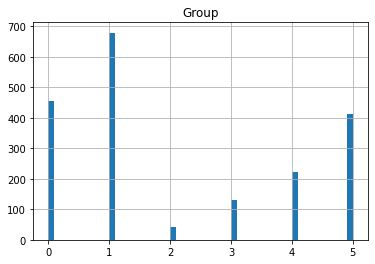

In [13]:
df1.hist(column='Group', bins=50)

In [14]:
df_imputed=df1.drop(['title', 'abstract'], axis=1)
df_imputed


Group         0         1         2         3         4         5  \
0         1  0.024093  0.003332  0.026175 -0.056424  0.066987  0.064344   
1         5  0.000738  0.028788  0.008383  0.015660 -0.002792 -0.023342   
2         1 -0.029008  0.036773  0.016296 -0.066768  0.026380  0.067563   
3         5  0.025092 -0.005877  0.036179 -0.007282  0.044100  0.047946   
4         5 -0.020635  0.030479 -0.051886 -0.055125 -0.052440  0.051107   
...     ...       ...       ...       ...       ...       ...       ...   
1936      4 -0.044237 -0.020313 -0.048073 -0.056209  0.043061  0.056523   
1937      5 -0.035588  0.058073 -0.050484 -0.037032  0.016111  0.060505   
1938      0 -0.060424 -0.000134 -0.058672 -0.038685  0.032710  0.027704   
1939      0 -0.013489  0.049279 -0.059444 -0.058115 -0.059752 -0.035380   
1940      5  0.019092  0.012424 -0.057948 -0.051789  0.025150  0.044273   

             6         7         8  ...       502       503       504  \
0    -0.015630 -0.065082  0.063505  ... -0.030333 -0.068542  0.004144   
1     0.039279 -0.006778 -0.046869  ... -0.064577 -0.065933 -0.046359   
2     0.040172 -0.060464 -0.026711  ... -0.009418 -0.068801 -0.007311   
3     0.032226  0.004009  0.051182  ... -0.057155 -0.065491 -0.047325   
4    -0.022648 -0.009215  0.052870  ... -0.028083 -0.061142 -0.018120   
...        ...       ...       ...  ...       ...       ...       ...   
1936 -0.000632  0.027694  0.040570  ... -0.058062 -0.058796 -0.045975   
1937  0.057046 -0.047282  0.031583  ... -0.059808 -0.061199 -0.018811   
1938 -0.024062 -0.059046  0.029137  ... -0.061882 -0.062241 -0.037259   
1939  0.058563 -0.054313  0.057236  ... -0.059849 -0.062269 -0.055467   
1940 -0.001287 -0.016542  0.047858  ... -0.038026 -0.064721 -0.034635   

           505       506       507       508       509       510       511  
0    -0.068533 -0.047693 -0.045203  0.038434 -0.052579 -0.026946 -0.064774  
1    -0.065978 -0.057970 -0.046468  0.047742 -0.053377 -0.034778  0.007275  
2    -0.068773 -0.016543  0.005688  0.041948 -0.049344 -0.005887 -0.032376  
3    -0.065456 -0.027758 -0.018844  0.033387 -0.059728 -0.057004 -0.043818  
4    -0.061137 -0.049363 -0.026236  0.053327 -0.014145 -0.046835 -0.060753  
...        ...       ...       ...       ...       ...       ...       ...  
1936 -0.058796  0.050993 -0.033669  0.041798 -0.057656 -0.012462 -0.054203  
1937 -0.061199 -0.020907 -0.026319  0.028944 -0.047205 -0.041322 -0.023640  
1938 -0.062241  0.039949  0.027875  0.060479 -0.058036 -0.061445 -0.058604  
1939 -0.062269  0.023908 -0.041097  0.012535 -0.033178 -0.048842 -0.040750  
1940 -0.064720  0.046162  0.005062  0.034183 -0.047033 -0.006123 -0.060960  

[1941 rows x 513 columns]

In [15]:
# we want to predict the X and y data as follows:

if 'Group' in df_imputed:
    y = df_imputed['Group'].values # get the labels we want
    del df_imputed['Group'] # get rid of the class label
    X = df_imputed.values # use everything else to predict

In [16]:
type(y)

numpy.ndarray

In [17]:
type(X)

numpy.ndarray

In [18]:
# features=

In [19]:
# #it's good practice to Scale Data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_train = scaler.fit_transform(X)
# scaled_train_df = pd.DataFrame(scaled_train, columns=features)

In [20]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [21]:
type(X_test)

numpy.ndarray

In [22]:

print(len(y_test))
print(len(y_train))

389
1552


In [23]:
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")


In [24]:
tf.compat.v1.disable_eager_execution() #disable eager execution,since got error AttributeError: Tensor.graph is meaningless when eager execution is enabled.

In [25]:
FEATURES=512
weight_decay=1e-5

In [26]:
model = tf.keras.Sequential([
    layers.Dense(300, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 #kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dropout(0.1),
        layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    #layers.Dense(units, activation=activation_func),
    #layers.SimpleRNN(100,unroll=True),
    layers.Dense(6 ,activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_crossentropy', patience=10)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=74, batch_size=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               153900    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               9

1552/1552 [==============================] - 0s 100us/sample - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.9146 - val_accuracy: 0.8252
Epoch 46/74
1552/1552 [==============================] - 0s 101us/sample - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.9349 - val_accuracy: 0.8406
Epoch 47/74
1552/1552 [==============================] - 0s 99us/sample - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.9122 - val_accuracy: 0.8252
Epoch 48/74
1552/1552 [==============================] - 0s 99us/sample - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.9839 - val_accuracy: 0.8380
Epoch 49/74
1552/1552 [==============================] - 0s 101us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.9355 - val_accuracy: 0.8278
Epoch 50/74
1552/1552 [==============================] - 0s 99us/sample - loss: 0.0065 - accuracy: 0.9994 - val_loss: 1.0514 - val_accuracy: 0.8226
Epoch 51/74
1552/1552 [==============================] - 0s 100us/sample - loss: 0.0113 - accuracy: 0.9974 - val_loss: 1.

In [27]:
model2 = tf.keras.Sequential([
    layers.Dense(300, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 #kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dropout(0.1),
        layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    #layers.Dense(units, activation=activation_func),
    #layers.SimpleRNN(100,unroll=True),
    layers.Dense(6 ,activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_crossentropy', patience=10)

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=1000)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               153900    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               9

1552/1552 [==============================] - 0s 43us/sample - loss: 0.0741 - accuracy: 0.9813 - val_loss: 0.5000 - val_accuracy: 0.8638
Epoch 46/150
1552/1552 [==============================] - 0s 42us/sample - loss: 0.0673 - accuracy: 0.9839 - val_loss: 0.5293 - val_accuracy: 0.8586
Epoch 47/150
1552/1552 [==============================] - 0s 41us/sample - loss: 0.0595 - accuracy: 0.9884 - val_loss: 0.5394 - val_accuracy: 0.8560
Epoch 48/150
1552/1552 [==============================] - 0s 42us/sample - loss: 0.0527 - accuracy: 0.9936 - val_loss: 0.5609 - val_accuracy: 0.8638
Epoch 49/150
1552/1552 [==============================] - 0s 42us/sample - loss: 0.0549 - accuracy: 0.9839 - val_loss: 0.5525 - val_accuracy: 0.8509
Epoch 50/150
1552/1552 [==============================] - 0s 42us/sample - loss: 0.0438 - accuracy: 0.9910 - val_loss: 0.6127 - val_accuracy: 0.8483
Epoch 51/150
1552/1552 [==============================] - 0s 43us/sample - loss: 0.0379 - accuracy: 0.9955 - val_loss: 

1552/1552 [==============================] - 0s 42us/sample - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.8915 - val_accuracy: 0.8535
Epoch 101/150
1552/1552 [==============================] - 0s 43us/sample - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.8715 - val_accuracy: 0.8586
Epoch 102/150
1552/1552 [==============================] - 0s 54us/sample - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.8488 - val_accuracy: 0.8432
Epoch 103/150
1552/1552 [==============================] - 0s 56us/sample - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.8429 - val_accuracy: 0.8535
Epoch 104/150
1552/1552 [==============================] - 0s 50us/sample - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.8533 - val_accuracy: 0.8586
Epoch 105/150
1552/1552 [==============================] - 0s 48us/sample - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.8858 - val_accuracy: 0.8586
Epoch 106/150
1552/1552 [==============================] - 0s 43us/sample - loss: 0.0088 - accuracy: 0.9987 - val_

In [62]:
model3 = tf.keras.Sequential([
    layers.Dense(300, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 #kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dropout(0.1),
        layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    #layers.Dense(units, activation=activation_func),
    #layers.SimpleRNN(100,unroll=True),
    layers.Dense(6 ,activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_crossentropy', patience=10)

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=33, batch_size=1000)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               153900    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               9

1552/1552 [==============================] - 0s 43us/sample - loss: 0.0915 - accuracy: 0.9762 - val_loss: 0.5076 - val_accuracy: 0.8329
Epoch 46/99
1552/1552 [==============================] - 0s 42us/sample - loss: 0.0817 - accuracy: 0.9781 - val_loss: 0.5580 - val_accuracy: 0.8355
Epoch 47/99
1552/1552 [==============================] - 0s 42us/sample - loss: 0.0874 - accuracy: 0.9768 - val_loss: 0.5525 - val_accuracy: 0.8406
Epoch 48/99
1552/1552 [==============================] - 0s 42us/sample - loss: 0.0718 - accuracy: 0.9800 - val_loss: 0.5609 - val_accuracy: 0.8355
Epoch 49/99
1552/1552 [==============================] - 0s 41us/sample - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.5777 - val_accuracy: 0.8432
Epoch 50/99
1552/1552 [==============================] - 0s 43us/sample - loss: 0.0623 - accuracy: 0.9871 - val_loss: 0.6375 - val_accuracy: 0.8252
Epoch 51/99
1552/1552 [==============================] - 0s 44us/sample - loss: 0.0670 - accuracy: 0.9826 - val_loss: 0.5931

In [28]:
X_test.shape

(389, 512)

In [86]:
 
y_pred_keras = model3.predict(X_test)[:, :]
y_pred_keras

array([[3.30692346e-05, 8.57529104e-01, 1.19833094e-04, 1.42269045e-01,
        4.87127363e-06, 4.40536205e-05],
       [8.37417722e-12, 9.42595720e-01, 1.76103390e-06, 4.68781245e-08,
        6.04083468e-08, 5.74023910e-02],
       [3.18489583e-17, 4.17857180e-08, 3.34375611e-10, 9.37431821e-08,
        7.27239449e-14, 9.99999881e-01],
       ...,
       [4.26550461e-15, 4.85930286e-06, 8.53585647e-09, 1.09471834e-07,
        4.97527757e-12, 9.99994993e-01],
       [1.65195713e-15, 1.41987710e-08, 1.51477819e-09, 8.01407438e-08,
        7.32183465e-13, 9.99999881e-01],
       [1.87581901e-14, 7.49869764e-01, 3.84779746e-08, 1.51611715e-07,
        1.42665629e-10, 2.50130057e-01]], dtype=float32)

In [87]:
max_index = np.argmax(y_pred_keras, axis=1)
max_index

array([1, 1, 5, 0, 5, 5, 0, 1, 1, 1, 0, 4, 4, 1, 4, 5, 5, 1, 1, 5, 4, 0,
       1, 0, 0, 5, 4, 0, 1, 5, 0, 5, 0, 5, 4, 5, 5, 1, 4, 4, 3, 1, 3, 0,
       5, 1, 4, 1, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 1, 5, 1, 5, 1, 1, 4, 0,
       0, 5, 1, 3, 4, 1, 4, 1, 0, 1, 4, 1, 1, 0, 1, 0, 1, 0, 2, 1, 5, 4,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 3, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 4,
       1, 1, 1, 1, 0, 5, 4, 4, 0, 5, 0, 5, 0, 5, 1, 1, 5, 5, 1, 0, 1, 1,
       4, 1, 1, 0, 4, 0, 1, 5, 1, 1, 1, 3, 1, 1, 5, 0, 5, 1, 5, 1, 1, 0,
       1, 5, 1, 0, 5, 4, 0, 4, 0, 4, 1, 5, 0, 0, 3, 4, 3, 5, 1, 5, 2, 4,
       1, 1, 1, 1, 1, 0, 5, 1, 1, 1, 0, 1, 1, 4, 3, 0, 5, 1, 0, 5, 1, 1,
       0, 4, 1, 1, 3, 1, 0, 5, 0, 1, 5, 5, 1, 4, 4, 3, 1, 5, 1, 4, 1, 4,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 3, 0, 0, 5, 1, 2, 1, 5, 4, 0, 1, 0, 4,
       1, 4, 3, 1, 1, 1, 5, 1, 5, 1, 0, 1, 1, 5, 1, 5, 1, 2, 5, 5, 4, 1,
       0, 1, 5, 1, 0, 1, 4, 1, 3, 2, 0, 1, 1, 2, 3, 0, 1, 5, 0, 1, 1, 1,
       5, 3, 1, 0, 1, 1, 3, 3, 0, 5, 4, 5, 0, 0, 5,

In [88]:
y_test

array([3, 5, 5, 0, 5, 5, 3, 1, 1, 1, 0, 4, 4, 1, 4, 1, 5, 1, 1, 5, 4, 0,
       1, 0, 0, 5, 4, 0, 1, 1, 0, 5, 0, 5, 4, 5, 5, 1, 4, 4, 3, 1, 1, 0,
       5, 1, 4, 1, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 5, 3, 5, 5, 1, 4, 0,
       1, 5, 1, 0, 4, 1, 4, 1, 0, 1, 4, 1, 1, 0, 5, 0, 1, 0, 1, 5, 5, 1,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 4,
       3, 1, 1, 1, 0, 5, 4, 4, 0, 5, 0, 5, 0, 5, 1, 5, 5, 5, 1, 0, 1, 1,
       4, 1, 1, 0, 4, 0, 1, 5, 1, 1, 1, 3, 1, 1, 5, 0, 5, 4, 1, 1, 1, 0,
       1, 5, 1, 0, 5, 4, 0, 4, 4, 4, 1, 5, 0, 0, 3, 1, 3, 5, 1, 5, 2, 4,
       1, 1, 1, 0, 1, 0, 5, 5, 1, 1, 0, 1, 1, 0, 4, 1, 3, 3, 1, 5, 3, 3,
       0, 4, 1, 1, 0, 1, 0, 5, 0, 5, 5, 5, 5, 4, 1, 3, 1, 5, 1, 4, 1, 4,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 3, 0, 0, 5, 1, 2, 0, 5, 4, 0, 1, 0, 4,
       1, 4, 3, 1, 1, 1, 5, 1, 5, 1, 0, 1, 1, 5, 5, 5, 1, 2, 5, 5, 4, 2,
       0, 3, 5, 5, 0, 5, 4, 1, 3, 2, 0, 1, 1, 2, 3, 0, 5, 5, 0, 1, 1, 1,
       5, 1, 1, 0, 1, 5, 3, 3, 0, 5, 4, 5, 0, 0, 5,

In [89]:
max_index-y_test

array([-2, -4,  0,  0,  0,  0, -3,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -2,  0, -4,  0,  0,  0, -1,  0,
        0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -4,  0,  0,  0,  1,
       -4,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -3,  4,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -4,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -4,  0,  0,  0,
        0,  0,  4, -1, -1,  2, -2, -1,  0, -2, -2,  0,  0,  0,  0,  3,  0,
        0,  0,  0, -4,  0,  0, -4,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [90]:
sum((max_index-y_test)==0)/X_test.shape[0] #verify the method to calculate accuracy, confirm the number matches val loss output

0.8483290488431876

## Predict Hold Out dataset (new papers, no label)

In [36]:
df2= pd.read_csv('/kaggle/input/polymerase512vecholdout/HoldOut388_512vectors2WithTitles.csv')
df2.head()

title  \
0  Synthesis of virus-specific RNA in permeabiliz...   
1  Primary structure and post-translational proce...   
2  Comparison of the genome organization of toro-...   
3  The complete sequence (22 kilobases) of murine...   
4  De novo generation of defective interfering RN...   

                                            abstract         0         1  \
0  Abstract We have developed a permeabilized cel... -0.049652 -0.011094   
1  Abstract The nucleotide sequence of the peplom...  0.002379  0.018184   
2  Abstract Recently, toroviruses and coronavirus... -0.036349 -0.000761   
3  Abstract The 5′-most gene, gene 1, of the geno...  0.007206 -0.013924   
4  Abstract Defective interfering (DI) RNAs were ... -0.049280 -0.035973   

          2         3         4         5         6         7  ...       502  \
0 -0.026801 -0.002311  0.042196  0.021205 -0.003560  0.020746  ... -0.056881   
1 -0.040164 -0.030494  0.008339  0.061669 -0.012344 -0.002478  ... -0.051405   
2 -0.050869 -0.034782  0.035800  0.060601  0.005766 -0.029210  ...  0.035874   
3 -0.027915  0.040264  0.007304  0.058013 -0.036737  0.023549  ... -0.057039   
4 -0.050783 -0.031401  0.031795  0.059310  0.052120  0.020553  ... -0.010444   

        503       504       505       506       507       508       509  \
0 -0.070640 -0.017600 -0.070502 -0.000305 -0.008354  0.054538 -0.007377   
1 -0.065164 -0.010036 -0.065149  0.049234 -0.030314  0.048964  0.011794   
2 -0.063528 -0.059635 -0.063528  0.034254 -0.030137  0.043699 -0.005431   
3 -0.058295 -0.052740 -0.058295  0.014025 -0.054457  0.053144 -0.055570   
4 -0.062296 -0.037243 -0.062295 -0.053315 -0.030183  0.038881 -0.047072   

        510       511  
0 -0.035350 -0.052909  
1 -0.028852 -0.064704  
2  0.057524 -0.056803  
3  0.049414 -0.057258  
4  0.060653 -0.056800  

[5 rows x 514 columns]

In [37]:
df_imputed2=df2.drop(['title', 'abstract'], axis=1)
df_imputed2

0         1         2         3         4         5         6  \
0   -0.049652 -0.011094 -0.026801 -0.002311  0.042196  0.021205 -0.003560   
1    0.002379  0.018184 -0.040164 -0.030494  0.008339  0.061669 -0.012344   
2   -0.036349 -0.000761 -0.050869 -0.034782  0.035800  0.060601  0.005766   
3    0.007206 -0.013924 -0.027915  0.040264  0.007304  0.058013 -0.036737   
4   -0.049280 -0.035973 -0.050783 -0.031401  0.031795  0.059310  0.052120   
..        ...       ...       ...       ...       ...       ...       ...   
383  0.000114  0.058478 -0.004469 -0.063835  0.006031  0.020011  0.008401   
384 -0.048442 -0.035224 -0.057540 -0.035870  0.056764  0.058271  0.055362   
385 -0.038116 -0.015935 -0.051716  0.026050  0.053225  0.058031  0.043148   
386 -0.055184  0.056014 -0.050239  0.027768 -0.047458 -0.010766  0.043399   
387 -0.013489  0.049279 -0.059444 -0.058115 -0.059752 -0.035380  0.058563   

            7         8         9  ...       502       503       504  \
0    0.020746  0.045434  0.025883  ... -0.056881 -0.070640 -0.017600   
1   -0.002478  0.036577  0.026191  ... -0.051405 -0.065164 -0.010036   
2   -0.029210  0.022040  0.053824  ...  0.035874 -0.063528 -0.059635   
3    0.023549  0.011380  0.048981  ... -0.057039 -0.058295 -0.052740   
4    0.020553  0.001214  0.057714  ... -0.010444 -0.062296 -0.037243   
..        ...       ...       ...  ...       ...       ...       ...   
383 -0.063798  0.057093 -0.025551  ... -0.015296 -0.067067 -0.012751   
384 -0.055081  0.045430  0.043651  ... -0.032115 -0.061738 -0.052958   
385 -0.037475  0.028737  0.049610  ... -0.040447 -0.061073 -0.030382   
386 -0.054596 -0.028848 -0.024939  ... -0.037741 -0.056081 -0.044042   
387 -0.054313  0.057236 -0.007523  ... -0.059849 -0.062269 -0.055467   

          505       506       507       508       509       510       511  
0   -0.070502 -0.000305 -0.008354  0.054538 -0.007377 -0.035350 -0.052909  
1   -0.065149  0.049234 -0.030314  0.048964  0.011794 -0.028852 -0.064704  
2   -0.063528  0.034254 -0.030137  0.043699 -0.005431  0.057524 -0.056803  
3   -0.058295  0.014025 -0.054457  0.053144 -0.055570  0.049414 -0.057258  
4   -0.062295 -0.053315 -0.030183  0.038881 -0.047072  0.060653 -0.056800  
..        ...       ...       ...       ...       ...       ...       ...  
383 -0.067071 -0.028087 -0.046303  0.056527 -0.058321 -0.019072 -0.036170  
384 -0.061738  0.044325 -0.048101  0.059945 -0.059864 -0.048209 -0.052417  
385 -0.061073  0.006920 -0.007703  0.049406 -0.058802 -0.046988 -0.056345  
386 -0.056081  0.054785 -0.054763  0.039602  0.006800  0.003140 -0.056081  
387 -0.062269  0.023908 -0.041097  0.012535 -0.033178 -0.048842 -0.040750  

[388 rows x 512 columns]

In [38]:
x_test2=df_imputed2
x_test2.shape

(388, 512)

In [91]:
y_pred_keras2 = model3.predict(x_test2)[:, :]
y_pred_keras2

array([[2.8089293e-13, 2.2500164e-04, 6.2351788e-08, 2.6549000e-07,
        9.6379633e-09, 9.9977463e-01],
       [7.4413191e-15, 8.8794230e-05, 1.7204231e-08, 4.3084292e-06,
        1.5985503e-12, 9.9990690e-01],
       [1.3546286e-16, 2.7941818e-09, 2.8289568e-10, 1.6754200e-07,
        9.9920784e-14, 9.9999988e-01],
       ...,
       [2.5890672e-12, 8.2237921e-07, 1.2557287e-07, 1.9742844e-05,
        3.0645381e-10, 9.9997926e-01],
       [1.2883337e-02, 9.4705415e-01, 1.2804248e-04, 3.9934229e-02,
        6.0132685e-08, 1.0217527e-07],
       [9.9998665e-01, 1.1529357e-05, 7.5085904e-07, 9.8765975e-07,
        9.7637901e-08, 2.9973628e-11]], dtype=float32)

In [92]:
max_indexMLP = np.argmax(y_pred_keras2, axis=1)
max_indexMLP

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       3, 4, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 4, 3, 4, 1, 0, 5, 1, 3, 3, 3, 1,
       0, 5, 1, 5, 3, 1, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 1, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 1, 1, 5, 1, 1, 5, 2, 5, 5, 0, 5, 1, 3, 0, 1, 4, 0, 1, 1, 5,
       5, 0, 1, 1, 5, 0, 5, 1, 2, 3, 1, 0, 1, 5, 1, 4, 5, 1, 5, 1, 2, 5,
       1, 5, 0, 0, 1, 2, 5, 0, 0, 5, 1, 5, 2, 5, 1, 1, 5, 5, 5, 3, 0, 1,
       4, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 5, 4, 0, 5, 1, 5, 1, 2, 2, 0,
       1, 1, 5, 5, 1, 5, 5, 3, 2, 4, 1, 1, 5, 5, 0,

## Validation method 2
## Compare MLP with RF predictions

In [93]:
## compare MLP with RF predictions

# RF results:
# preds[0:20] 
# Out[48]:
# array([[0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 1, 0],
#        [0, 0, 0, 0, 1, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1]], dtype=uint8)
# [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5],

# MLP results 1-20
# [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 

## For the two methods, the first 20 predictions match perfectly!

In [94]:
# RF preds[21:40]

# Out[51]:
# array([[0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 1, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 1, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 1, 0]], dtype=uint8)
#([1, 1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4],

# MLP results 21-40
# 5, 1, 1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4,

In [95]:
max_indexRF=[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       1, 4, 1, 0, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 0, 0, 4, 1, 0, 5, 1, 3, 1, 3, 1,
       0, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 5, 1, 5, 1, 0, 5, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 0, 1, 0, 1, 5, 1, 4, 5, 1, 0, 1, 1, 5,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 5, 0, 5, 0, 1, 5, 5, 5, 0, 0, 1,
       4, 1, 5, 5, 0, 0, 5, 1, 5, 5, 1, 0, 5, 4, 0, 5, 1, 5, 1, 1, 1, 0,
       1, 1, 5, 5, 1, 5, 5, 1, 1, 0, 1, 0, 0, 5, 0, 5, 1, 1, 1, 5, 0, 0,
       5, 0, 0, 0, 5, 1, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 1, 1, 0, 0, 5,
       1, 5, 5, 1, 5, 0, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 0, 0, 5, 1,
       1, 0, 0, 1, 5, 0, 0, 1, 1, 5, 1, 5, 5, 1, 5, 5, 0, 0, 0, 5, 1, 1,
       0, 0, 0, 4, 5, 0, 5, 1, 0, 1, 0, 5, 0, 0]
max_indexRF

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 1,
 1,
 4,
 4,
 1,
 5,
 5,
 5,
 1,
 1,
 5,
 1,
 5,
 5,
 4,
 5,
 1,
 1,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 5,
 4,
 3,
 1,
 5,
 5,
 1,
 4,
 1,
 0,
 1,
 4,
 1,
 1,
 0,
 4,
 0,
 1,
 5,
 0,
 4,
 1,
 5,
 1,
 5,
 3,
 5,
 5,
 1,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 1,
 4,
 4,
 1,
 4,
 5,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 5,
 1,
 1,
 1,
 1,
 5,
 0,
 0,
 5,
 4,
 1,
 0,
 1,
 1,
 4,
 1,
 0,
 4,
 4,
 1,
 4,
 4,
 3,
 0,
 1,
 0,
 0,
 4,
 1,
 0,
 5,
 1,
 3,
 1,
 3,
 1,
 0,
 5,
 1,
 5,
 3,
 5,
 1,
 1,
 1,
 5,
 4,
 0,
 1,
 1,
 4,
 4,
 4,
 0,
 4,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 5,
 2,
 0,
 1,
 1,
 0,
 4,
 1,
 3,
 0,
 0,
 5,
 1,
 1,
 0,
 0,
 5,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 4,
 5,
 0,
 5,
 1,
 0,
 1,
 5,
 0,
 5,
 1,
 5,
 1,
 1,
 5,
 1,
 5,
 1,
 0,
 5,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 5,
 1,
 1,
 1,
 5,
 0,
 5,
 1,
 1,
 0,
 1,
 0,
 1,
 5,
 1,
 4,
 5,
 1,
 0,
 1,
 1,
 5,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,


In [96]:
max_indexMLP-max_indexRF

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  4,  3,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0, -4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -4,  0,  0,  0,
        0,  0,  1,  0,  4,  0,  0,  1,  3,  0,  0,  4,  0,  0,  0,  5,  0,
       -1,  0,  0,  0,  0

## How well MLP and RF predictions match?
### 0.8144329896907216
### 81.4%

### If we have a third algo results, we can have a ensemble model with majority vote.

In [97]:
sum((max_indexMLP-max_indexRF)==0)/x_test2.shape[0]

0.8118556701030928

### Therefore, I run a GXB. The result is as below:


In [70]:
max_indexXGB=[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 5, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 4, 5, 5,
       1, 4, 1, 2, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 1, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 1, 0, 1, 4, 3, 4, 1, 0, 1, 1, 5, 1, 3, 1,
       1, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 1, 5, 1, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 0, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 1, 2, 5, 5, 0, 5, 1, 3, 0, 1, 4, 0, 1, 1, 5,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 3, 1, 0, 1, 5, 1, 4, 5, 1, 5, 1, 1, 5,
       1, 5, 0, 0, 1, 2, 5, 0, 0, 5, 1, 5, 2, 5, 1, 1, 5, 5, 5, 1, 0, 1,
       4, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 1, 5, 4, 0, 5, 1, 5, 1, 2, 2, 0,
       1, 1, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 1, 5, 0, 5, 1, 2, 1, 5, 5, 2,
       5, 5, 1, 2, 5, 4, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 5, 1, 3, 3, 5,
       5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       1, 5, 5, 1, 5, 5, 0, 1, 1, 3, 1, 5, 5, 1, 5, 5, 2, 5, 2, 5, 1, 1,
       5, 5, 3, 4, 5, 5, 5, 1, 3, 1, 5, 5, 0, 0]

In [71]:
sum((max_indexMLP-max_indexXGB)==0)/x_test2.shape[0]

0.8943298969072165

## XGB predictions match well with MLP predictions with 89.7% agreement.
#### 0.8943298969072165  / 0.8969072164948454

In [72]:
sum((max_indexRF-max_indexXGB)==0)/x_test2.shape[0]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [73]:
type(max_indexMLP)

numpy.ndarray

In [74]:
type(max_indexRF)

list

In [75]:
type(max_indexXGB)

list

In [76]:
npRF= np.asarray(max_indexRF, dtype=np.float32)
type(npRF)

numpy.ndarray

In [77]:
sum((npRF-max_indexXGB)==0)/x_test2.shape[0]

0.8118556701030928

## XGB vs RF: agree on 81.2% of the predictions

In [78]:
npRF-max_indexXGB

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -4.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -3.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -4., -4.,  0.,  0.,
        0.,  0.,  0., -1.,  0.,  0.,  0., -4.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  0.,  0., -4., -3.,  0.,  0.,  0.,  4.,  0., -2.,  0.,
        0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

## Majority Vote
### For this purpose, I will stack these three predictions and count the mode of each column.

In [79]:
dfAll = np.array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       4, 4, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 3, 3, 4, 1, 0, 5, 1, 3, 0, 3, 1,
       0, 5, 1, 5, 3, 1, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 1, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 1, 1, 5, 1, 1, 5, 2, 5, 5, 0, 5, 1, 3, 0, 1, 4, 0, 1, 1, 5,
       5, 0, 1, 1, 5, 0, 5, 1, 2, 3, 1, 0, 1, 5, 1, 4, 5, 1, 5, 1, 2, 5,
       1, 5, 0, 0, 1, 2, 5, 0, 0, 5, 1, 5, 2, 5, 5, 1, 5, 5, 5, 3, 0, 1,
       4, 1, 5, 5, 1, 5, 5, 1, 5, 1, 1, 1, 5, 4, 0, 5, 1, 5, 1, 2, 2, 0,
       1, 1, 5, 5, 1, 5, 5, 3, 2, 4, 1, 1, 5, 5, 0, 5, 1, 2, 1, 5, 1, 2,
       5, 5, 1, 2, 5, 4, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 1, 1, 3, 3, 3,
       5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 1, 5, 5, 0, 1, 1, 3, 1, 1, 5, 1, 5, 5, 2, 5, 2, 5, 1, 1,
       5, 5, 3, 3, 5, 5, 5, 1, 1, 1, 5, 5, 3, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       1, 4, 1, 0, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 0, 0, 4, 1, 0, 5, 1, 3, 1, 3, 1,
       0, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 5, 1, 5, 1, 0, 5, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 0, 1, 0, 1, 5, 1, 4, 5, 1, 0, 1, 1, 5,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 5, 0, 5, 0, 1, 5, 5, 5, 0, 0, 1,
       4, 1, 5, 5, 0, 0, 5, 1, 5, 5, 1, 0, 5, 4, 0, 5, 1, 5, 1, 1, 1, 0,
       1, 1, 5, 5, 1, 5, 5, 1, 1, 0, 1, 0, 0, 5, 0, 5, 1, 1, 1, 5, 0, 0,
       5, 0, 0, 0, 5, 1, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 1, 1, 0, 0, 5,
       1, 5, 5, 1, 5, 0, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 0, 0, 5, 1,
       1, 0, 0, 1, 5, 0, 0, 1, 1, 5, 1, 5, 5, 1, 5, 5, 0, 0, 0, 5, 1, 1,
       0, 0, 0, 4, 5, 0, 5, 1, 0, 1, 0, 5, 0, 0],[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 5, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 4, 5, 5,
       1, 4, 1, 2, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 1, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 1, 0, 1, 4, 3, 4, 1, 0, 1, 1, 5, 1, 3, 1,
       1, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 1, 5, 1, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 0, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 1, 2, 5, 5, 0, 5, 1, 3, 0, 1, 4, 0, 1, 1, 5,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 3, 1, 0, 1, 5, 1, 4, 5, 1, 5, 1, 1, 5,
       1, 5, 0, 0, 1, 2, 5, 0, 0, 5, 1, 5, 2, 5, 1, 1, 5, 5, 5, 1, 0, 1,
       4, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 1, 5, 4, 0, 5, 1, 5, 1, 2, 2, 0,
       1, 1, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 1, 5, 0, 5, 1, 2, 1, 5, 5, 2,
       5, 5, 1, 2, 5, 4, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 5, 1, 3, 3, 5,
       5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       1, 5, 5, 1, 5, 5, 0, 1, 1, 3, 1, 5, 5, 1, 5, 5, 2, 5, 2, 5, 1, 1,
       5, 5, 3, 4, 5, 5, 5, 1, 3, 1, 5, 5, 0, 0]])


In [80]:
dfAll 

array([[5, 5, 5, ..., 5, 3, 0],
       [5, 5, 5, ..., 5, 0, 0],
       [5, 5, 5, ..., 5, 0, 0]])

In [81]:
dfAll = pd.DataFrame(dfAll)


In [82]:
dfAll

0    1    2    3    4    5    6    7    8    9    ...  378  379  380  381  \
0    5    5    5    5    5    5    5    5    5    5  ...    5    5    5    1   
1    5    5    5    5    5    5    5    5    5    5  ...    5    0    5    1   
2    5    5    5    5    5    5    5    5    5    5  ...    5    5    5    1   

   382  383  384  385  386  387  
0    1    1    5    5    3    0  
1    0    1    0    5    0    0  
2    3    1    5    5    0    0  

[3 rows x 388 columns]

In [83]:
dfAll.mode(axis=0)

0    1    2    3    4    5    6    7    8    9    ...  378  379  380  381  \
0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...  5.0  5.0  5.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   382  383  384  385  386  387  
0    0  1.0  5.0  5.0  0.0  0.0  
1    1  NaN  NaN  NaN  NaN  NaN  
2    3  NaN  NaN  NaN  NaN  NaN  

[3 rows x 388 columns]

In [84]:
dfAll.mode(axis=0).isnull().sum()

0      2
1      2
2      2
3      2
4      2
      ..
383    2
384    2
385    2
386    2
387    2
Length: 388, dtype: int64

In [85]:
x_test2.shape[0]-dfAll.mode(axis=0).isnull().sum().sum()/2

10.0

### From the calculation above, we know there are 10 instances that all three methods produce different predictions. So the majority vote would not work. For a problem like this with 6 classes, we need 7 different models to ensemble to make sure there is a majority vote result.

## Future work:
#### improvement consider it is a imbalance dataset use class weight